In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

# Carregar arquivos
+ leitura de arquivos no programa e concatenação dos arquivos mensais em dataframes com dados anuais

In [2]:
#LEITURA DOS DADOS DE 2015 EM UM ÚNICO DATASET
lista = []
caminho = '2015/2015_{}.csv'
for i in range(1,13):
    lista.append(pd.read_csv(caminho.format(i)))
    
dados2015 = pd.concat(lista)
dados2015.columns = ['SiglaDaEmpresa', 'NúmeroDoVoo', 'DI', 'TipoDeLinha', 'AeroportoOrigem', 'AeroportoDestino', 'PartidaPrevista', 'PartidaReal', 'ChegadaPrevista', 'ChegadaReal', 'Situacao', 'Justificativa', 'mes']

#Exibir informações do dataset
#print(dados2015.shape)
#print(dados2015.columns)
#dados2015.head()



/home/leandro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#LEITURA DOS DADOS DE 2016 EM UM ÚNICO DATASET
lista.clear()
caminho = '2016/2016_{}.csv'
for i in range(1,13):
    lista.append(pd.read_csv(caminho.format(i)))
    
dados2016 = pd.concat(lista)
dados2016.columns = ['SiglaDaEmpresa', 'NúmeroDoVoo', 'DI', 'TipoDeLinha', 'AeroportoOrigem', 'AeroportoDestino', 'PartidaPrevista', 'PartidaReal', 'ChegadaPrevista', 'ChegadaReal', 'Situacao', 'Justificativa', 'mes']


In [4]:
#LEITURA DOS DADOS DE 2017 EM UM ÚNICO DATASET
lista.clear()
caminho = '2017/2017_{}.csv'
for i in range(1,13):
    lista.append(pd.read_csv(caminho.format(i)))
    
dados2017 = pd.concat(lista)
dados2017.columns = ['SiglaDaEmpresa', 'NúmeroDoVoo', 'DI', 'TipoDeLinha', 'AeroportoOrigem', 'AeroportoDestino', 'PartidaPrevista', 'PartidaReal', 'ChegadaPrevista', 'ChegadaReal', 'Situacao', 'Justificativa', 'mes']


In [5]:
#LEITURA DOS DADOS DE 2018 EM UM ÚNICO DATASET
lista.clear()
caminho = '2018/2018_{}.csv'
for i in range(1,13):
    lista.append(pd.read_csv(caminho.format(i)))
    
dados2018 = pd.concat(lista)
dados2018.columns = ['SiglaDaEmpresa', 'NúmeroDoVoo', 'DI', 'TipoDeLinha', 'AeroportoOrigem', 'AeroportoDestino', 'PartidaPrevista', 'PartidaReal', 'ChegadaPrevista', 'ChegadaReal', 'Situacao', 'Justificativa', 'mes']


In [6]:
#LEITURA DOS DADOS DE 2019 EM UM ÚNICO DATASET
lista.clear()
caminho = '2019/2019_{}.csv'
for i in range(1,13):
    lista.append(pd.read_csv(caminho.format(i)))
    
dados2019 = pd.concat(lista)
dados2019.columns = ['SiglaDaEmpresa', 'NúmeroDoVoo', 'DI', 'TipoDeLinha', 'AeroportoOrigem', 'AeroportoDestino', 'PartidaPrevista', 'PartidaReal', 'ChegadaPrevista', 'ChegadaReal', 'Situacao', 'Justificativa', 'mes']


# Visualizar se os dataframes foram carregados de maneira correta
+ 5 primeiras linhas de cada um deles

In [ ]:
dados2015.head()

In [ ]:
dados2016.head()

In [ ]:
dados2017.head()

In [ ]:
dados2018.head()

In [ ]:
dados2019.head()

# Criação de gráficos para gerar a dashboard

In [ ]:
#Histograma: quantidade de voos por empresa
#Observar tamanho da figura para que apareçam de maneira mais legível os nomes das empresas
#Talvez retirar algumas das empresas que fizeram menor número de voos para melhorar a visualização
dados2015['SiglaDaEmpresa'].hist(bins = 82 , figsize = (35, 12))

In [ ]:
dados2015.columns

In [10]:
#Selecionar dataset com colunas de empresas e meses do ano de 2015
dados2015PorMes = dados2015.filter(items = ['SiglaDaEmpresa', 'mes'], axis = 1).groupby('mes').count()

In [11]:
#Adicionar coluna com números referentes ao mês
#Facilita na ordenação
dados2015PorMes['mesNumero'] = [4, 8, 12, 2, 1, 7, 6, 5, 3, 11, 10, 9]

In [12]:
#Ordenar o dataframe
dados2015PorMes = dados2015PorMes.sort_values(by = "mesNumero", ascending = True)

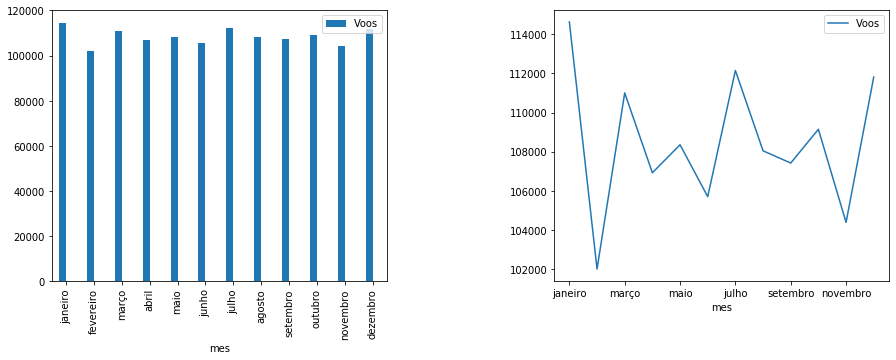

In [13]:
fig, ax = plt.subplots(1,2)

fig.subplots_adjust(wspace = 0.5)

#Criar gráfico de barras para a quantidade de voos por mês
ax1 = dados2015PorMes.plot.bar(figsize = (15,5),ax = ax[0])
#ax1.set_title('Variação dos voos em 2015 ao longo dos meses')
ax1.legend(labels = ['Voos'])

#Gerar gráfico de linha com a variação na quantidade de voos no ano de 2015
ax2 = dados2015PorMes.drop(columns = ["mesNumero"]).plot(ax = ax[1])
#ax2.set_title('Variação dos voos em 2015 ao longo dos meses')
ax2.legend(labels = ['Voos'])

In [ ]:
dados2015.filter(items = ['SiglaDaEmpresa', 'mes'], axis = 1)

In [ ]:
#Importar numpy para utilizar a função np.where() para adicionar a coluna atrasou ou não atrasou ao dataset.
import numpy as np

In [ ]:
#Adicionar coluna informando se o voo atrasou ou não
#Voos cancelados aparecem como atrasados -> como mudar?
dados2015["Atrasou"] = np.where(dados2015['PartidaPrevista'] >= dados2015['PartidaReal'],0,1)

In [ ]:
#Histograma com a quantidade de voos que atrasaram e que não atrasaram
dados2015['Atrasou'].hist(bins = 3 , figsize = (10, 5))

In [ ]:
#Histograma com os meses nos quais mais se viajou em 2015
dados2015['mes'].hist(bins = 24 , figsize = (20, 8))

In [ ]:
#Selecionar dados em dataset apenas com coluna de nome da empresa e informação de atraso. 
dadosSelecionados = dados2015.filter(items = ['SiglaDaEmpresa', 'Atrasou'])

In [ ]:
#Remover os NaN do conjunto de dados
dadosSelecionados = dadosSelecionados.dropna()

In [ ]:
dadosSelecionados.columns = ['Voos', 'Situacao']

In [ ]:
dadosSelecionados.head()

In [ ]:
#Quantidade de dados que atrasaram e não atrasaram
AtrasouOuNao = dadosSelecionados.groupby("Situacao").count().sort_values(by = "Voos", ascending = False)

In [ ]:
AtrasouOuNao.index = ['Atrasou', 'Não atrasou']

In [ ]:
AtrasouOuNao.head()

In [ ]:
AtrasouOuNao.plot.bar()

In [ ]:
dados2015.columns

In [ ]:
dadosSelecionados.head()